# Processamento de imagens usando fatiamento do Numpy

Uma introdução sobre como representar, ler e exibir imagens no Adessowiki podem ser vista em:
 
- `master:tutorial_img_ds Representação, Leitura e Visualização de Imagens no Adessowiki`.

O conceito de fatiamento (slicing) do Numpy é um dos mais importantes para processamento de imagens, tanto
pela sua versatilidade como pela sua eficiência. Reunimos nesta página um conjunto de processamento de
imagens utilizando quase que exclusivamente operações de fatiamento.

Para entender melhor como o fatiamento funciona, recomenda-se ver uma explicação didática do fatiamento:

- `tutorial_numpy_1_2 Fatiamentos unidimensionais`
- `tutorial_numpy_1_3 Fatiamentos bidimensionais`

## 1.1 Sobrepondo reticulado

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
!ls ..

LICENSE   README.md data      deliver   dev       figures   master    src


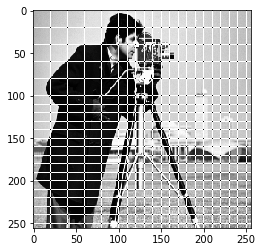

In [23]:
    f=mpimg.imread('../data/cameraman.tif')
    plt.imshow(f,cmap='gray')
    f[::10,:] = 255 # linhas horizontais
    f[:,::10] = 255 # linhas verticais
    f[::10,::10] = 0 # linhas horizontais
    plt.imshow(f, cmap='gray')
    # Nao tem a mesma separacao porque para o display mostrar a imagen tira algumas linhas ou colunas
    # Entao se voce vai de 10 em 10, aquela filha 10n pode coincidir com a que foi tirada

## Sobrepondo frame preto na imagem

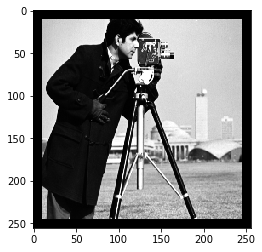

In [28]:
    f=mpimg.imread('../data/cameraman.tif')
    plt.imshow(f,cmap='gray')
    f[   :10,   :  ] = 0 # frame superior
    f[-10:  ,   :  ] = 0 # frame inferior. DEsde a 10 antes de ultima ate a ultima
    f[   :  ,   :10] = 0 # frame esquerdo
    f[   :  ,-10:  ] = 0 # frame direito
    plt.imshow(f,cmap='gray')

## Rotação 90 graus

Uma técnica simples para se fazer uma rotação antihorária da matriz, é calcular a matriz transposta e depois
refleti-la na vertical:

original shape:(256, 128)


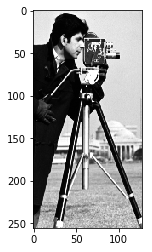

In [29]:
    f=mpimg.imread('../data/cameraman.tif')[:,64:192]
    plt.imshow(f,cmap='gray') 
    print('original shape:%s'%(f.shape,))
    

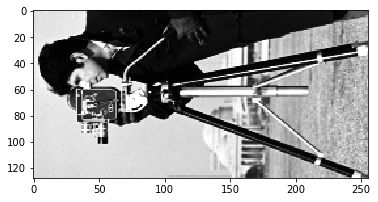

In [30]:
    g = f.transpose()
    plt.imshow(g,cmap='gray')#Nao e rotacao, pq teria que mirar para acima e ta para abaixo, 
    #é só a trasnsposta, temos que refletir

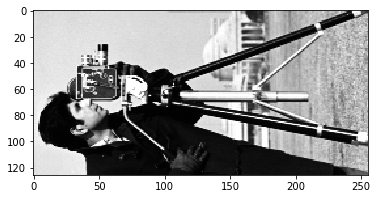

In [35]:
plt.imshow(g[128:1:-1,::],cmap='gray')

## Subamostragem

shape=(256, 128)


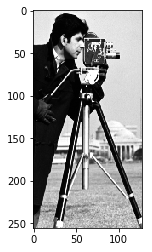

In [39]:
    f=mpimg.imread('../data/cameraman.tif')[:,64:192]
    plt.imshow(f,cmap='gray') 
    print('shape=%s' % (f.shape,) )
    

shape=(128, 64)


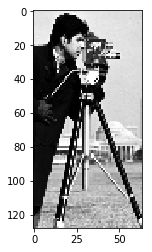

In [41]:
g = f[::2,::2]
plt.imshow(g,cmap='gray')
print('shape=%s' % (g.shape,) )

## Ampliação

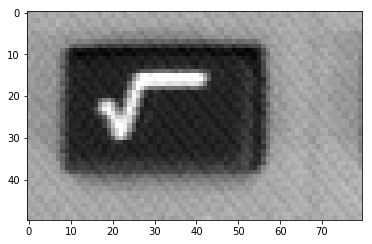

In [44]:
    import numpy as np
    
    f=mpimg.imread('../data/keyb.tif')[:50,:80]
    plt.imshow(f,cmap='gray') 
    
   

(100, 160)


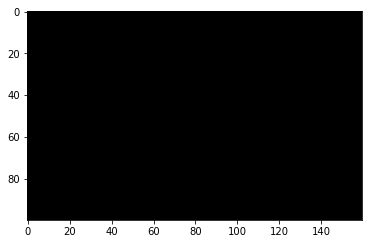

In [47]:
H,W = f.shape
g = np.zeros( (2*H,2*W), 'uint8')
plt.imshow(g,cmap='gray')
print(g.shape)

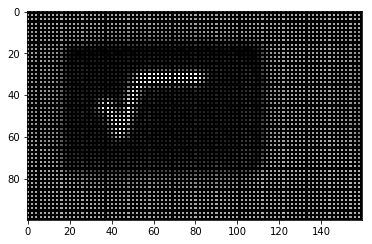

In [48]:
g[ ::2, ::2] = f
plt.imshow(g,cmap='gray')

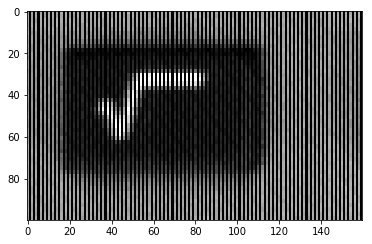

In [49]:
g[1::2, ::2] = f
plt.imshow(g,cmap='gray')

[[156 156 165 ..., 170 178 178]
 [156 156 165 ..., 170 178 178]
 [173 173 165 ..., 173 181 181]
 ..., 
 [165 165 173 ..., 178 165 165]
 [156 156 165 ..., 173 181 181]
 [156 156 165 ..., 173 181 181]] ampliada por replicação (100, 160)


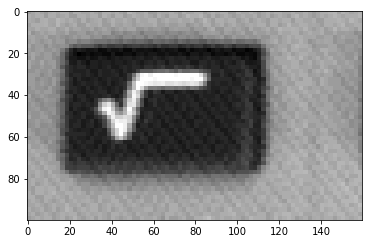

In [50]:
g[1::2,1::2] = f
g[ ::2,1::2] = f
print(g, 'ampliada por replicação %s' % (g.shape,) )
plt.imshow(g,cmap='gray')

## Separando campos pares e impares entrelaçados

original com dois campos


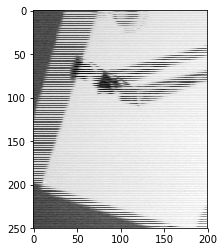

In [52]:
    f=mpimg.imread('../data/tvframe.pgm')[:250,:200]
    plt.imshow(f,cmap='gray') 
    print('original com dois campos')

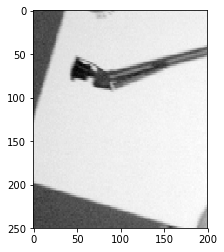

In [59]:
g_even = np.zeros_like(f)
g_even[::2] = f[::2]
g_even[1::2] = f[::2]
plt.imshow(g_even,cmap='gray') 

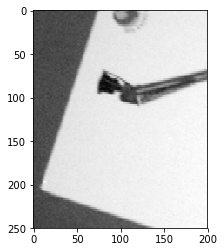

In [58]:
g_odd = np.zeros_like(f)
g_odd[::2]  = f[1::2]
g_odd[1::2] = f[1::2]
plt.imshow(g_odd,cmap='gray') 

In [61]:
ns=np.array(g_even.shape)+np.array(g_odd.shape) #Convirtiendo Tupla en Array para que no se concatene
print(ns)

[500 400]


In [62]:
ns1=np.array(g_even.shape)
ns=ns1+np.array([g_odd.shape[0],0])
print(tuple(ns))

(500, 200)


In [63]:
g=np.empty(ns)
g=[:g_even.shape[0]]=g_even
g=[g_even.shape[0],:]=g_odd
plt.imshow(g,cmap='gray')

SyntaxError: invalid syntax (<ipython-input-63-a27a87d45dc3>, line 2)

### Reescrevendo o código para torná-lo mais legivel

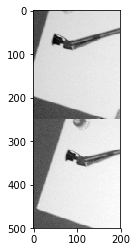

In [64]:
H_even,W_even=g_even.shape
H_odd, W_odd=g_odd.shape
F=np.empty((H_even+H_odd,W_even))
F[:H_even]=g_even
F[H_even:]=g_odd
plt.imshow(F,cmap='gray')

## Combinando duas imagens: linhas pares de uma e ímpares de outra

blobs.pbm     cameraman.tif keyb.tif      tvframe.pgm
boat.tif      gull.pgm      lenina.pgm    woodlog.tif


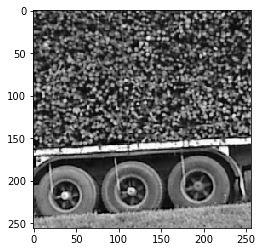

In [66]:
    !ls ../data
    f1 = mpimg.imread('../data/woodlog.tif')
    plt.imshow(f1,cmap='gray')
    

blobs.pbm     cameraman.tif keyb.tif      tvframe.pgm
boat.tif      gull.pgm      lenina.pgm    woodlog.tif


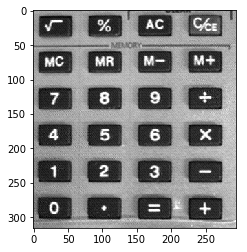

In [69]:
!ls ../data
f2 = mpimg.imread('../data/keyb.tif')
plt.imshow(f2,cmap='gray')

(256, 256) (316, 295)
256
256


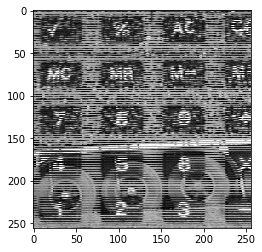

In [76]:
#ns=np.minimum(np.array(f1.shape), np.array(f2.shape))
print(f1.shape,f2.shape)
H=np.minimum(f1.shape[0],f2.shape[0])
W=np.minimum(f1.shape[1],f2.shape[1])
print(np.minimum(f1.shape[0],f2.shape[0]))
print(np.minimum(f1.shape[1],f2.shape[1]))
g = np.array(f1[:H,:W])
g[::2,:] = f2[:H:2,:W]
plt.imshow(g,cmap='gray')

(256, 256) (316, 295)


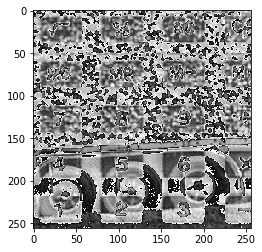

In [79]:
ns=np.minimum(np.array(f1.shape), np.array(f2.shape))
print(f1.shape,f2.shape)
H=np.minimum(f1.shape[0],f2.shape[0])
W=np.minimum(f1.shape[1],f2.shape[1])
g = f1[:H,:W]+ f2[:H,:W]
#Os valores sao mayores a 255
plt.imshow(g,cmap='gray')

(256, 256) (316, 295)


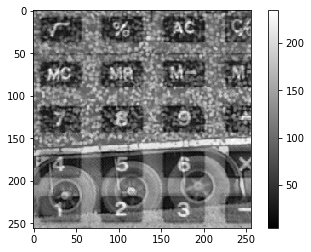

In [84]:
ns=np.minimum(np.array(f1.shape), np.array(f2.shape))
print(f1.shape,f2.shape)
H=np.minimum(f1.shape[0],f2.shape[0])
W=np.minimum(f1.shape[1],f2.shape[1])
g = f1[:H,:W]//2+ f2[:H,:W]//2 ## com isso os valores ja fican na faixa certa
plt.imshow(g,cmap='gray')
plt.colorbar()

(256, 256) (316, 295)
combinando f1+f2 usando ponto flutuante


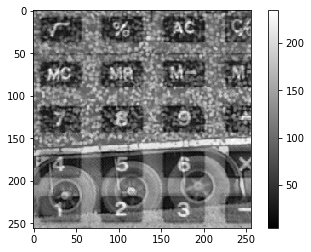

In [85]:
ns=np.minimum(np.array(f1.shape), np.array(f2.shape))
print(f1.shape,f2.shape)
H=np.minimum(f1.shape[0],f2.shape[0])
W=np.minimum(f1.shape[1],f2.shape[1])
g = (f1[:H,:W]//2+ f2[:H,:W]//2).astype(np.float) ## com isso os valores ja fican na faixa certa
plt.imshow(g,cmap='gray')
plt.colorbar()
print('combinando f1+f2 usando ponto flutuante') # é melhor, float trabalaha bem. Nao é o mesmo q o anterior

## Montagem e reflexão vertical e horizontal

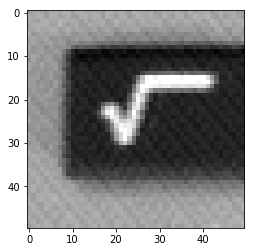

In [86]:
    f=mpimg.imread('../data/keyb.tif')[:50,:50]
    plt.imshow(f,cmap='gray') 

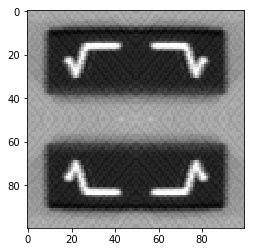

In [88]:
H,W = f.shape
g = np.empty( (2*H,2*W), 'uint8')
g[:H,:W] = f          # original no quadrante superior esquerdo
g[H:,:W] = f[::-1,:]  # refletida vertical no quadrante inferior esquerdo
g[:H,W:] = f[:,::-1]  # refletida horizontal no quadrante superior direito
g[H:,W:] = f[::-1,::-1] # refletida vert. e hor. no quadrante inferior direito
plt.imshow(g,cmap='gray')

## Translação

Uma operação primitiva que é utilizada na construção de várias outras operações é
a translação de uma imagem por um fator de deslocamento na vertical e na horizontal.
Numpy permite fazer translações extremamente eficientes utilizando fatiamento. O 
exemplo abaixo, a imagem **g** é deslocada de (dH,dW).

reticulado de passo 10 pixels


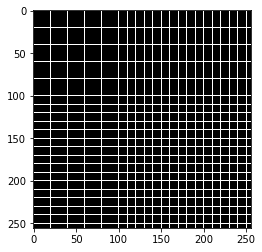

In [100]:
f = np.zeros((256,256),'uint8')
f[::10,:] = 255
f[:,::10] = 255
print('reticulado de passo 10 pixels')
plt.imshow(f,cmap='gray')
    

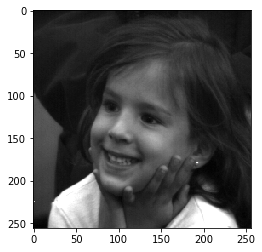

In [101]:
g = mpimg.imread('../data/lenina.pgm') 
plt.imshow(g,cmap='gray')

In [102]:
H,W = g.shape
print(g.shape)
f[:H,:W] = g
dH,dW = (50,100)
f[dH:H+dH,dW:W+dW] = g
plt.imshow(f,cmap='gray')

(256, 256)


ValueError: could not broadcast input array from shape (256,256) into shape (206,156)

## Outros exemplos

- `ia636:iaprofiledemo` - Ilustração para observar valores de cinza linha vertical na imagem